# Intelligent Mammogram Mass Analysis and Segmentation (IMMAS)

## Module import

In [1]:
%matplotlib inline

import immas
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'immas'

In [2]:
immas.test()

NameError: name 'immas' is not defined

## Reading files

This example shows how to read one image and create MammogramImage file

No ground truth result available, can be used for testing purposes


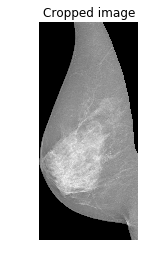

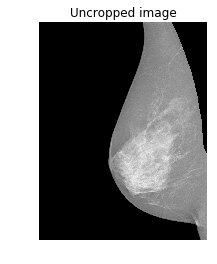

In [5]:
from immas import MammogramImage

path_image = "../dataset/images/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.png"
pectoral_muscle = "../dataset/pectoral_muscle_masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"

# contructor will automatically read data, if contrary not specified
# pectoral muscle will be removed from image if we have corresponding mask available
mm = MammogramImage(path_image, path_mask, pmuscle_mask_path=pectoral_muscle)

# check whether this image has ground truth segmentation result available
if mm.image_ground_truth:
    print('Ground truth available, can be used for training')
else:
    print('No ground truth result available, can be used for testing purposes')

# attribute .image_data contains actual image cropped according to the masks    
plt.imshow(mm.image_data, cmap="gray")
plt.axis('off')
plt.title('Cropped image')
plt.show()

#attribute .image_data contains actual image cropped according to the masks   
plt.imshow(mm.uncropped_image, cmap="gray")
plt.axis('off')
plt.title('Uncropped image')
plt.show()

This example shows how to read whole dataset

In [1]:
from immas.io import read_dataset

data_set = read_dataset(image_folder="../dataset/images",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks")

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.


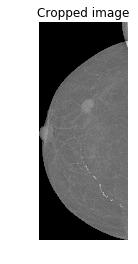

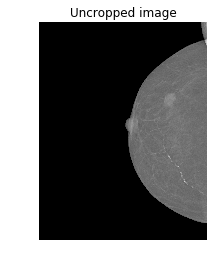

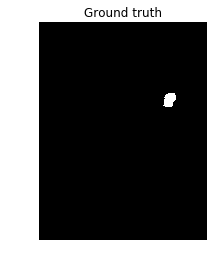

In [6]:
# let's show an example image that has also a ground truth image in dataset
for img in data_set:
    if img._ground_truth_path:
        mammogram = img
        mammogram.read_data()
        break


plt.imshow(mammogram.image_data, cmap="gray")
plt.axis('off')
plt.title('Cropped image')
plt.show()

plt.imshow(mammogram.uncropped_image, cmap="gray")
plt.axis('off')
plt.title('Uncropped image')
plt.show()

plt.imshow(mammogram.image_ground_truth, cmap="gray")
plt.axis('off')
plt.title('Ground truth')
plt.show()